In [2]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms

In [19]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
trainset = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle =True, num_workers = 0)
testset = torchvision.datasets.CIFAR10(root = './data', train= False, download = True, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 4, shuffle = False, num_workers = 0)
classes = ('plane','car','birs','cat','deer','dog','frog','horse','ship','truck')

Files already downloaded and verified
Files already downloaded and verified


  cat plane   cat plane


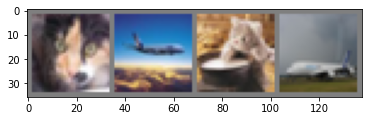

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img /2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    
dataiter = iter(trainloader)
images,labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s'% classes[labels[j]] for j in range(4)))

In [22]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [23]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.01, momentum = 0.9)

In [25]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i%2000 ==1999:
            print('[%d, %5d] loss: %.3f'%(epoch+1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 2.084
[1,  4000] loss: 1.973
[1,  6000] loss: 1.948
[1,  8000] loss: 1.965
[1, 10000] loss: 1.983
[1, 12000] loss: 2.010
[2,  2000] loss: 2.011
[2,  4000] loss: 1.992
[2,  6000] loss: 2.005
[2,  8000] loss: 2.042
[2, 10000] loss: 2.021
[2, 12000] loss: 2.063
Finished Training


GroundTruth:  truck  deer   car plane


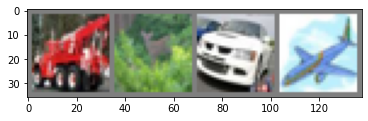

In [26]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [27]:
outputs = net(images)

In [28]:
_, predicted = torch.max(outputs, 1)
print('Predicted:', ' '.join('%5s'% classes[predicted[j]] for j in range(4)))

Predicted:  ship  frog  ship  ship


In [30]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuract of the network on the 10000 test images: %d %%' % (100* correct / total))

Accuract of the network on the 10000 test images: 17 %


In [32]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s ： %2d %%' % (classes[i], 100 * class_correct[i]/ class_total[i]))

Accuracy of plane ：  3 %
Accuracy of   car ：  0 %
Accuracy of  birs ： 17 %
Accuracy of   cat ：  0 %
Accuracy of  deer ：  0 %
Accuracy of   dog ： 31 %
Accuracy of  frog ： 29 %
Accuracy of horse ：  0 %
Accuracy of  ship ： 93 %
Accuracy of truck ：  0 %


In [33]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0
